# Stroke Prediction

We will be working with the [Stroke Prediction Data Set from Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). 

### Context
According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, smoking status etc. 

Attribute Information
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
- stroke: 1 if the patient had a stroke or 0 if not

## Import Libraries
Let's import some libraries to get started!

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [152]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [153]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [154]:
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [155]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the above we can see that the 'bmi' column has missing values.

## Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data
We can use simple heatmap to see where we are missing data!

<AxesSubplot:>

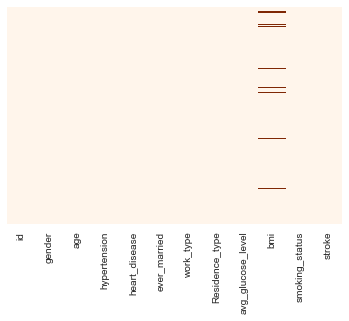

In [156]:
sns.heatmap(stroke_df.isnull(), yticklabels=False, cbar=False, cmap='Oranges')

A small number of bmi values are missing. The proportion of bmi values missing is small enough for reasonable replacement with some form of imputation.

Let's continue on by visualizing some more of the data.

<AxesSubplot:xlabel='stroke', ylabel='count'>

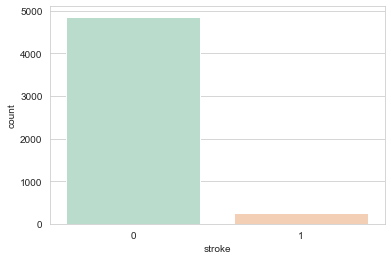

In [157]:
sns.set_style('whitegrid')
sns.countplot(x='stroke', data=stroke_df, palette='Pastel2')

<AxesSubplot:xlabel='gender', ylabel='count'>

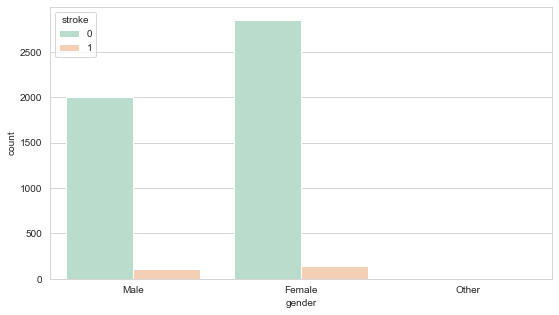

In [158]:
plt.figure(figsize=(9,5))
sns.countplot(x='gender', data=stroke_df, hue='stroke', palette='Pastel2')

In [159]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

From the above plot we can observe that there is more data for 'Female'.

<AxesSubplot:xlabel='age', ylabel='Count'>

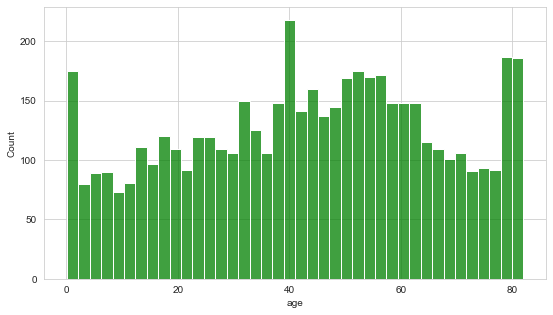

In [160]:
plt.figure(figsize=(9,5))
sns.histplot(data=stroke_df['age'], bins=40, color='green')

We can see from the above plot that there are about 200 rows of data where age is near 0.

<AxesSubplot:xlabel='stroke', ylabel='count'>

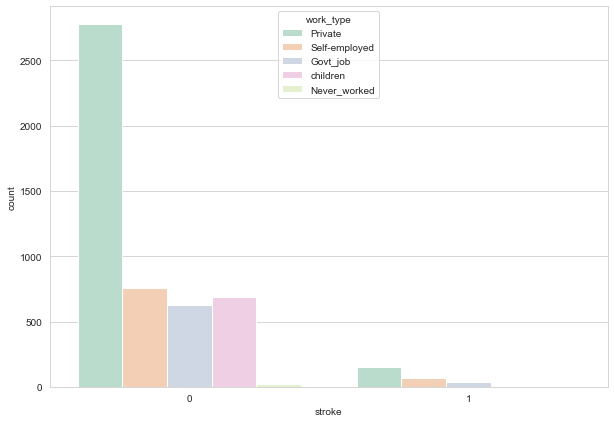

In [161]:
plt.figure(figsize=(10,7))
sns.countplot(x='stroke', data=stroke_df, hue='work_type', palette='Pastel2')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

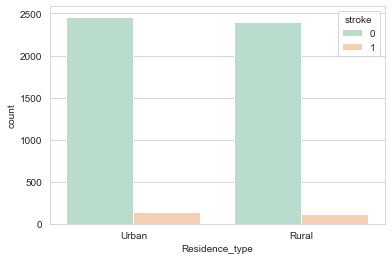

In [162]:
sns.countplot(x='Residence_type', data=stroke_df, hue='stroke', palette='Pastel2')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

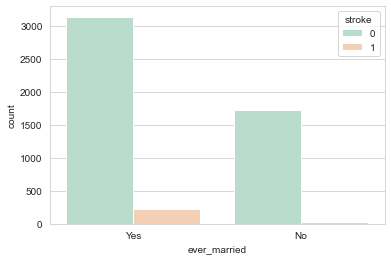

In [163]:
sns.countplot(x='ever_married', data=stroke_df, hue='stroke', palette='Pastel2')

<AxesSubplot:xlabel='stroke', ylabel='count'>

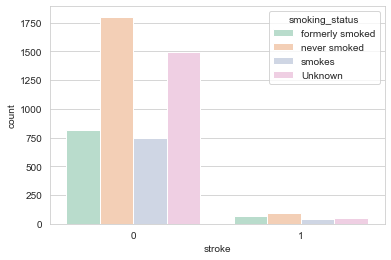

In [164]:
sns.countplot(x='stroke', data=stroke_df, hue='smoking_status', palette='Pastel2')

We observe that there is a lot of data with smoking_status 'Unknown'. 

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

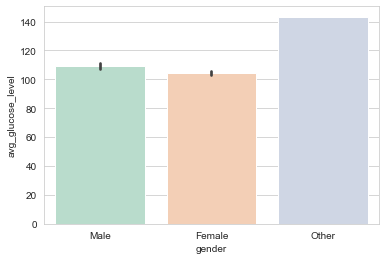

In [165]:
sns.barplot(x='gender', y='avg_glucose_level', data=stroke_df, palette='Pastel2')

In [166]:
stroke_df[stroke_df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


There is only one person with 'Other' gender. This might misinterpret the result. We can drop this data which can be treated as an outlier.

<AxesSubplot:xlabel='gender', ylabel='bmi'>

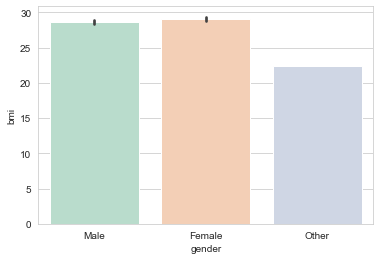

In [167]:
sns.barplot(x='gender', y='bmi', data=stroke_df, palette='Pastel2')

<AxesSubplot:>

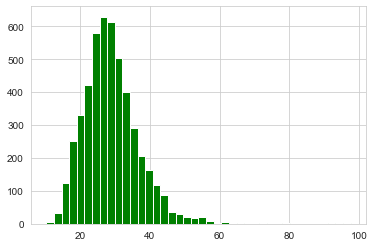

In [168]:
stroke_df['bmi'].hist(bins=40, color='green')

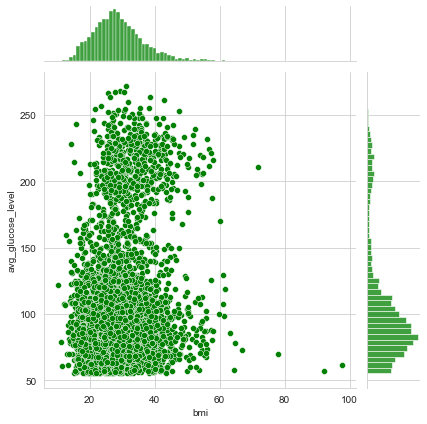

In [169]:
sns.jointplot(x='bmi', y='avg_glucose_level', data=stroke_df, kind='scatter', color='green')

<AxesSubplot:>

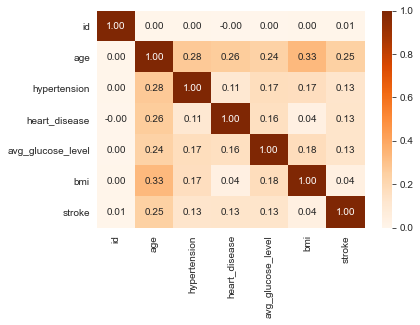

In [170]:
sns.heatmap(stroke_df.corr(), annot=True, cmap='Oranges', fmt='.2f')

## Data Cleaning and Data Imputation

In [171]:
stroke_df[stroke_df['bmi'].isnull() == True]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [172]:
other_i = stroke_df[stroke_df['gender']=='Other'].index
other_i

Int64Index([3116], dtype='int64')

In [173]:
stroke_df.drop(other_i, inplace=True, axis=0)

In [174]:
stroke_df.shape

(5109, 12)

In [175]:
child_female_bmi_mean = stroke_df[stroke_df['work_type']=='children'].groupby('gender').mean().loc['Female']['bmi']
child_female_bmi_mean

20.055

In [176]:
child_male_bmi_mean = stroke_df[stroke_df['work_type']=='children'].groupby('gender').mean().loc['Male']['bmi']
child_male_bmi_mean

20.02250712250713

In [177]:
child_female_i = stroke_df[(stroke_df['bmi'].isnull()==True) & (stroke_df['work_type']=='children') & (stroke_df['gender']=='Female')].index

In [178]:
child_female_i

Int64Index([162, 742, 1194, 1277, 2739, 3734], dtype='int64')

In [179]:
stroke_df.loc[child_female_i] = stroke_df.loc[child_female_i].fillna(value=child_female_bmi_mean)

In [180]:
child_male_i = stroke_df[(stroke_df['bmi'].isnull()==True) & (stroke_df['work_type']=='children') & (stroke_df['gender']=='Male')].index
child_male_i

Int64Index([1115, 1471, 1866, 2030, 3605, 3705, 3726, 3940, 4286, 4934], dtype='int64')

In [181]:
stroke_df.loc[child_male_i] = stroke_df.loc[child_male_i].fillna(value=child_male_bmi_mean)

In [182]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  185
smoking_status         0
stroke                 0
dtype: int64

In [183]:
stroke_df[stroke_df['bmi'].isnull()==True]['age'].describe()

count    185.000000
mean      56.091892
std       18.206162
min       14.000000
25%       42.000000
50%       59.000000
75%       72.000000
max       82.000000
Name: age, dtype: float64

In [184]:
stroke_df[(stroke_df['age']<=16) & (stroke_df['work_type']!='children')]['work_type'].value_counts()

Private          85
Never_worked     12
Self-employed     9
Govt_job          3
Name: work_type, dtype: int64

This data is incorrect as they are children who have work type mentioned as Govt_job or Self-employed or Private. We need to change this to children.

In [185]:
stroke_df[(stroke_df['age']<=16)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,20.055,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.900,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.000,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.600,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.100,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.800,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.300,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.400,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.500,Unknown,0


In [186]:
stroke_df.loc[(stroke_df['age']<=16),'work_type'] = 'children'

In [187]:
stroke_df[(stroke_df['age']<=16) & (stroke_df['work_type']!='children')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [188]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  185
smoking_status         0
stroke                 0
dtype: int64

In [191]:
stroke_df.groupby('gender').mean()['bmi']['Female']

29.047133999311104

In [192]:
stroke_df.loc[(stroke_df['gender']=='Female'), 'bmi']

1        NaN
3       34.4
4       24.0
7       22.8
8        NaN
        ... 
5104    18.6
5105     NaN
5106    40.0
5107    30.6
5109    26.2
Name: bmi, Length: 2994, dtype: float64

In [193]:
stroke_df.loc[(stroke_df['gender']=='Female'), 'bmi'] = stroke_df.loc[(stroke_df['gender']=='Female'), 'bmi'].fillna(stroke_df.groupby('gender').mean()['bmi']['Female'])

In [194]:
stroke_df.loc[(stroke_df['gender']=='Female'), 'bmi']

1       29.047134
3       34.400000
4       24.000000
7       22.800000
8       29.047134
          ...    
5104    18.600000
5105    29.047134
5106    40.000000
5107    30.600000
5109    26.200000
Name: bmi, Length: 2994, dtype: float64

In [195]:
stroke_df.groupby('gender').mean()['bmi']['Male']

28.605257333609657

In [197]:
stroke_df.loc[(stroke_df['gender']=='Male'), 'bmi'] = stroke_df.loc[(stroke_df['gender']=='Male'), 'bmi'].fillna(stroke_df.groupby('gender').mean()['bmi']['Male'])

In [198]:
stroke_df.loc[(stroke_df['gender']=='Male'), 'bmi']

0       36.600000
2       32.500000
5       29.000000
6       27.400000
13      28.605257
          ...    
5097    40.800000
5098    17.500000
5099    28.605257
5100    28.300000
5108    25.600000
Name: bmi, Length: 2115, dtype: float64

In [199]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64